In [39]:

# import packages 
#import tensorflow as tf
import pandas as pd  
import numpy as np 
import gzip
# from keras.models import Sequential
# from keras.layers import LSTM, GRU, Dense, Activation, Dropout, Input, Embedding, Bidirectional, Reshape, Flatten, Conv1D, MaxPooling1D, MaxPool1D, GlobalMaxPool1D, SpatialDropout1D
# from keras.preprocessing import text, sequence
# from keras import utils
# from keras import callbacks
# from keras import optimizers, models
# import keras_metrics
# from keras.utils import to_categorical


from sklearn import model_selection, preprocessing, metrics
import matplotlib.pyplot as plt
import zipfile

import nltk
import re

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# %load_ext memory_profiler

In [40]:
# load data 

# features 
current_dir = %pwd
dev_raw = pd.read_csv(current_dir+'/data/MCTest/mc160.dev.tsv', header=None, sep='\t')


In [41]:
pd.read_csv??

In [42]:
dev_raw.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22],
           dtype='int64')

In [43]:
dev_raw.head(1)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,mc160.dev.0,Author: 2670363255;Work Time(s): 1446,It was Jessie Bear's birthday. She was having ...,one: Who was having a birthday?,Jessie Bear,no one,Lion,Tiger,multiple: Who didn't come to the party?,Lion,...,multiple: How did Jessie get ready for the party?,made cake and juice.,made cake and hung balloons.,made juice and cookies.,made juice and hung balloons.,one: How many friends came to Jessie's party?,one,two,six,four


In [44]:
len(dev_raw[3].unique())

30

In [45]:
cols_raw=['id', 'description', 'story',
           'q1', 'a11', 'a12', 'a13', 'a14',
           'q2', 'a21', 'a22', 'a23', 'a24',
           'q3', 'a31', 'a32', 'a33', 'a34',
           'q4', 'a41', 'a42', 'a43', 'a44']

In [46]:
dev_raw.columns=cols_raw

In [47]:
dev_raw.head(1)

,id,description,story,q1,a11,a12,a13,a14,q2,a21,...,q3,a31,a32,a33,a34,q4,a41,a42,a43,a44
0,mc160.dev.0,Author: 2670363255;Work Time(s): 1446,It was Jessie Bear's birthday. She was having ...,one: Who was having a birthday?,Jessie Bear,no one,Lion,Tiger,multiple: Who didn't come to the party?,Lion,...,multiple: How did Jessie get ready for the party?,made cake and juice.,made cake and hung balloons.,made juice and cookies.,made juice and hung balloons.,one: How many friends came to Jessie's party?,one,two,six,four


In [48]:
#Checking multiple and single choice questions
for col in ['q1','q2','q3','q4']:
    print('{} count MCQ {} , count SCQ {}'.format(col,dev_raw[dev_raw[col].str.contains('multiple:')]['id'].count() ,
            dev_raw[dev_raw[col].str.contains('multiple:') == False]['id'].count()))


q1 count MCQ 17 , count SCQ 13
q2 count MCQ 13 , count SCQ 17
q3 count MCQ 22 , count SCQ 8
q4 count MCQ 15 , count SCQ 15


In [51]:
for col in ['q1','q2','q3','q4']:
    print("{} documents with null {}".format(dev_raw[col].isnull().sum(), col))



0 documents with null q1
0 documents with null q2
0 documents with null q3
0 documents with null q4


In [57]:
dev_raw['story_words'] = dev_raw.story.str.split().apply(lambda x: len(x))


In [58]:
dev_raw['story_words'] = dev_raw.story.str.split('').apply(lambda x: len(x))



0     140
1     167
2     113
3     274
4     192
5     220
6     166
7     156
8     153
9     159
10    323
11    139
12    171
13    164
14    178
15    161
16     99
17    194
18    384
19    146
20    280
21    223
22    353
23    177
24    158
25    194
26    153
27    153
28    217
29    244
Name: story_words, dtype: int64

In [81]:
pd.options.display.max_columns = 100000
pd.options.display.max_rows = 100000
pd.options.display.max_colwidth = 100000
pd.options.display.width = None


In [89]:
#Not working
dev_raw['story'].head(1).str.split('\\\\newline').replace(', ,'," ")

0    [It was Jessie Bear's birthday. She was having a party.  She asked her two best friends to, come to the party.  She made a big cake, and hung up some balloons., , Soon her friend Lion came over. Then her friend Tiger came over. Lion and Tiger brought, presents with them., , Jessie hugged her friends. She asked them if they would like to have cake. , , Yes! said Lion. Yes yes! said Tiger. Jessie cut the cake, and they all ate it together., Then Jessie opened her presents. She got a new jump rope and a fun game.  She asked Lion, and Tiger to play the game with her., , The friends played and played. They all had a good time. Soon it was time for the party to, be over., , Lion and Tiger hugged Jessie and said goodbye to her.  Thanks for a great birthday! Jessie, Bear told her two best friends.]
Name: story, dtype: object

In [101]:
#Not working
tmp_df['tmp_split']=dev_raw['story'].str.split('\\\\newline').to_string().split()

In [ ]:
import plotly.plotly as py


(array([ 2.,  6., 10.,  3.,  3.,  1.,  2.,  1.,  1.,  1.]),
 array([ 99. , 127.5, 156. , 184.5, 213. , 241.5, 270. , 298.5, 327. ,
        355.5, 384. ]),
 <a list of 10 Patch objects>)

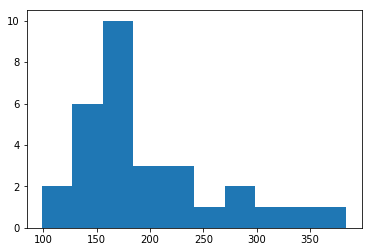

In [105]:
plt.hist(dev_raw['story_words'])

In [106]:
dev_raw['story_words'].describe()

count     30.000000
mean     195.033333
std       67.912461
min       99.000000
25%      153.750000
50%      169.000000
75%      219.250000
max      384.000000
Name: story_words, dtype: float64